# Customer Churn Analysis

Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Data Collection

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Checking the shape of dataset.

data.shape

(7043, 21)

In [4]:
# Checking the total columns.

data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
# Checking the dataset summary.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


There are total 18 object data type,2 integer data type,1 float data type in dataset.

In [6]:
# We will drop customer ID column as it is of no use.

data.drop('customerID',axis=1,inplace=True)

In [7]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

The customerID columns is dropped successfully.

In [8]:
# Checking the null values in the dataset.

data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no null values in dataset.

In [9]:
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors='coerce')
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
data.drop(labels=data[data["tenure"] == 0].index, axis = 0, inplace = True)

In [11]:
data.fillna(data["TotalCharges"].mean())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [12]:
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors='coerce')
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
# Checking the unique values in dataset.

data.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [14]:
data.SeniorCitizen = data.SeniorCitizen.map({0: "No", 1: "Yes"})
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


The dataset contains unique values in each columns but MonthlyCharges and TotalCharges have highest no. of null values.

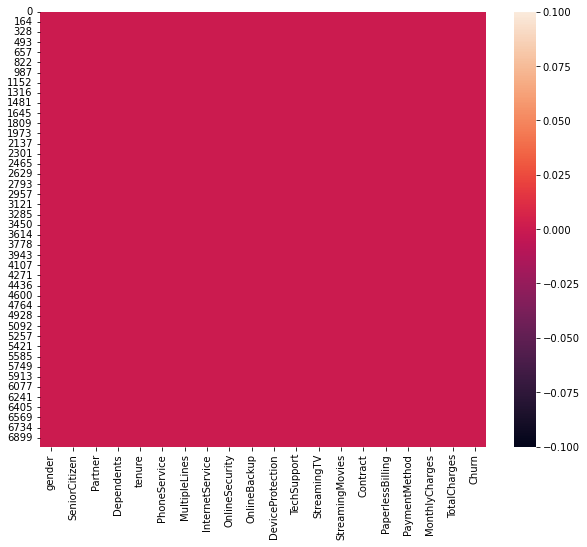

In [15]:
# Visualizing the null values using heatmap.

plt.figure(figsize=(10,8))
sns.heatmap(data.isnull())
plt.show()

From the above heatmap we can say that there are no null values in dataset.

In [16]:
# Checking the statistical summary of dataset.

data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


The dataset has total count of 7043 rows

# Exploratory Data Analysis(EDA)

# Univariate Analysis

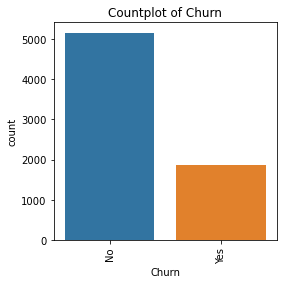

No     5163
Yes    1869
Name: Churn, dtype: int64

In [17]:
# Visualizing Target column 'Churn' using countplot.

plt.subplots(figsize=(4,4))
sns.countplot(x='Churn', data=data)
plt.title("Countplot of Churn")
plt.xticks(rotation=90)
plt.xlabel('Churn')
plt.ylabel("count")
plt.show()

data['Churn'].value_counts()

Customer churn is the percentage of customers that stopped using your company's product or service during a certain time frame.so we can seemost of people are using the company services and very less not using.

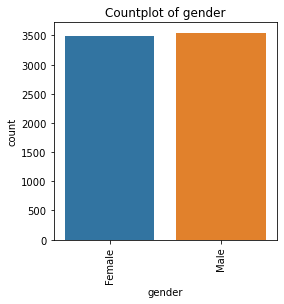

Male      3549
Female    3483
Name: gender, dtype: int64

In [18]:
# Visualizing gender column using countplot.

plt.subplots(figsize=(4,4))
sns.countplot(x='gender', data=data)
plt.title("Countplot of gender")
plt.xticks(rotation=90)
plt.xlabel('gender')
plt.ylabel("count")
plt.show()

data['gender'].value_counts()

Most of people churned are males.

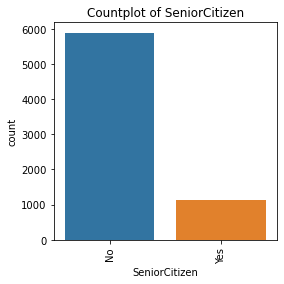

No     5890
Yes    1142
Name: SeniorCitizen, dtype: int64

In [19]:
# Visualizing SeniorCitizen column using countplot.

plt.subplots(figsize=(4,4))
sns.countplot(x='SeniorCitizen', data=data)
plt.title("Countplot of SeniorCitizen")
plt.xticks(rotation=90)
plt.xlabel('SeniorCitizen')
plt.ylabel("count")
plt.show()

data['SeniorCitizen'].value_counts()

Most of the people churned are not senior citizens, they are Adulta or middle age.

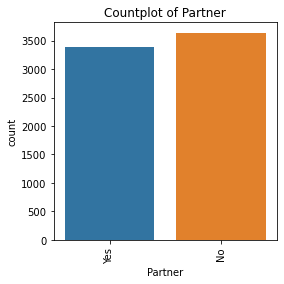

No     3639
Yes    3393
Name: Partner, dtype: int64

In [20]:
# Visualizing Partner column using countplot.

plt.subplots(figsize=(4,4))
sns.countplot(x='Partner', data=data)
plt.title("Countplot of Partner")
plt.xticks(rotation=90)
plt.xlabel('Partner')
plt.ylabel("count")
plt.show()

data['Partner'].value_counts()

Most of people churned are partners.

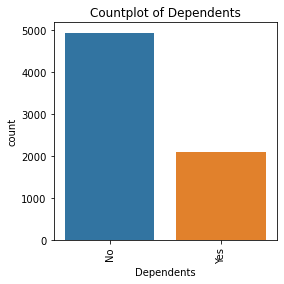

No     4933
Yes    2099
Name: Dependents, dtype: int64

In [21]:
# Visualizing Dependents column using countplot.

plt.subplots(figsize=(4,4))
sns.countplot(x='Dependents', data=data)
plt.title("Countplot of Dependents")
plt.xticks(rotation=90)
plt.xlabel('Dependents')
plt.ylabel("count")
plt.show()

data['Dependents'].value_counts()

Most no. of people that are churned are independent.

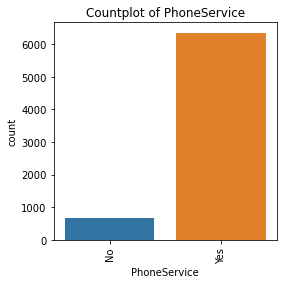

Yes    6352
No      680
Name: PhoneService, dtype: int64

In [22]:
# Visualizing PhoneServices column using countplot.

plt.subplots(figsize=(4,4))
sns.countplot(x='PhoneService', data=data)
plt.title("Countplot of PhoneService")
plt.xticks(rotation=90)
plt.xlabel('PhoneService')
plt.ylabel("count")
plt.show()

data['PhoneService'].value_counts()

Most of people that are churned have PhoneServices.

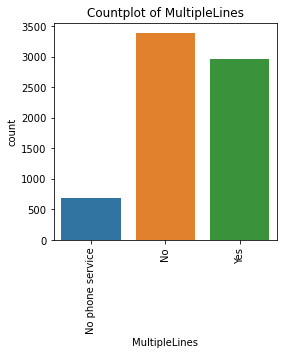

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

In [23]:
# Visualizing Multiplelines column using countplot.

plt.subplots(figsize=(4,4))
sns.countplot(x='MultipleLines', data=data)
plt.title("Countplot of MultipleLines")
plt.xticks(rotation=90)
plt.xlabel('MultipleLines')
plt.ylabel("count")
plt.show()

data['MultipleLines'].value_counts()

There are a majority of Customers who do not have a MultipleLines.

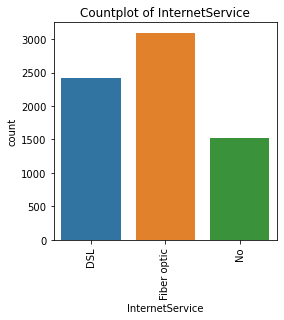

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [24]:
# Visualizing InternetService column using countplot.

plt.subplots(figsize=(4,4))
sns.countplot(x='InternetService', data=data)
plt.title("Countplot of InternetService")
plt.xticks(rotation=90)
plt.xlabel('InternetService')
plt.ylabel("count")
plt.show()

data['InternetService'].value_counts()

Most of the people churned use fibre optic for internet services and about 1500 dont use internet services.

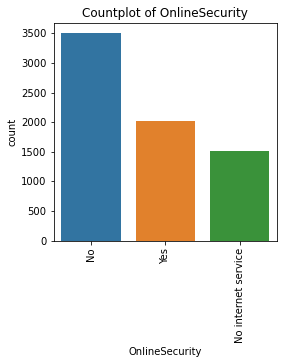

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

In [25]:
# Visualizing OnlineSecurity column using countplot.

plt.subplots(figsize=(4,4))
sns.countplot(x='OnlineSecurity', data=data)
plt.title("Countplot of OnlineSecurity")
plt.xticks(rotation=90)
plt.xlabel('OnlineSecurity')
plt.ylabel("count")
plt.show()

data['OnlineSecurity'].value_counts()

Most of the people don't have online security.

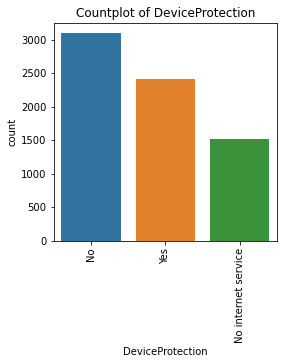

No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64

In [26]:
# Visualizing DeviceProtection column using countplot.


plt.subplots(figsize=(4,4))
sns.countplot(x='DeviceProtection', data=data)
plt.title("Countplot of DeviceProtection")
plt.xticks(rotation=90)
plt.xlabel('DeviceProtection')
plt.ylabel("count")
plt.show()

data['DeviceProtection'].value_counts()

Most of people don't have device protection.

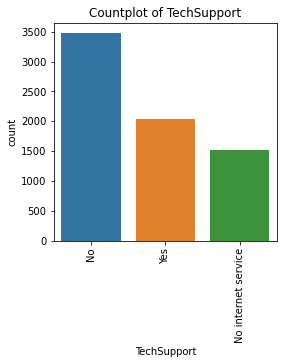

No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64

In [27]:
# Visualizing TechSupport column using countplot.

plt.subplots(figsize=(4,4))
sns.countplot(x='TechSupport', data=data)
plt.title("Countplot of TechSupport")
plt.xticks(rotation=90)
plt.xlabel('TechSupport')
plt.ylabel("count")
plt.show()

data['TechSupport'].value_counts()

Most of people don't use technical support.

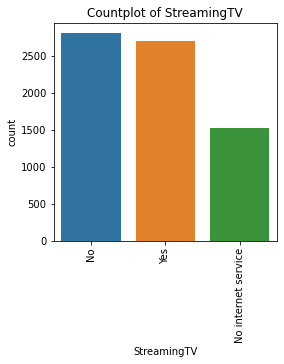

No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64

In [28]:
# Visualizing StreamingTV column using countplot.

plt.subplots(figsize=(4,4))
sns.countplot(x='StreamingTV', data=data)
plt.title("Countplot of StreamingTV")
plt.xticks(rotation=90)
plt.xlabel('StreamingTV')
plt.ylabel("count")
plt.show()

data['StreamingTV'].value_counts()

Most of the consumers have opted for TV Streaming service.

# Bivariate Analysis

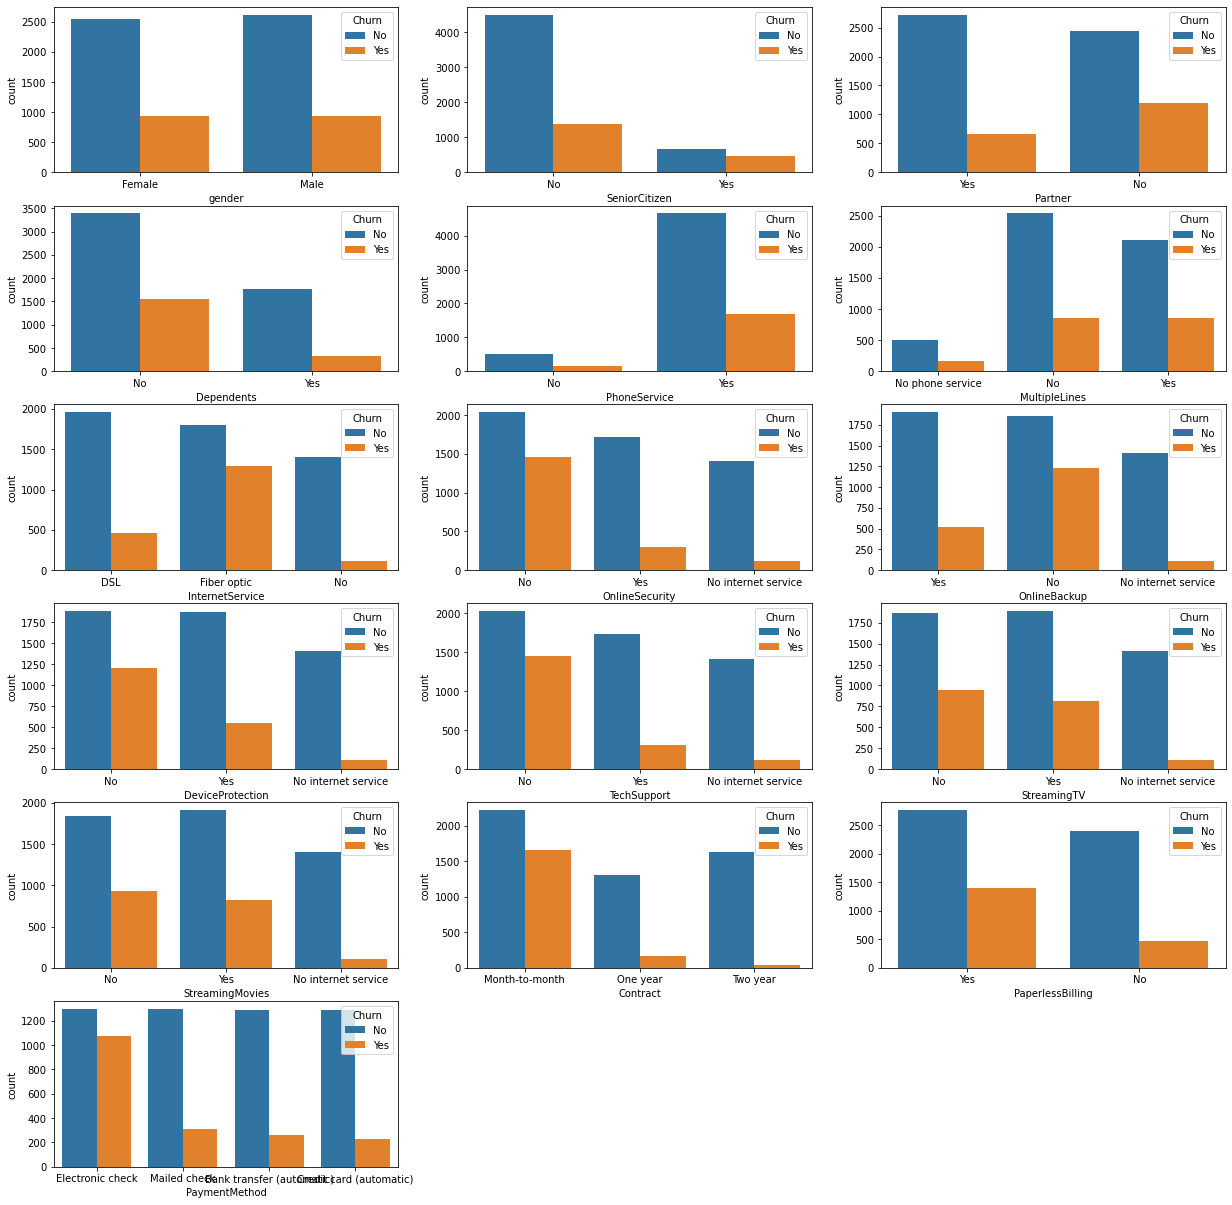

In [29]:
ccolumns=['gender','SeniorCitizen',"Partner","Dependents","PhoneService","MultipleLines","InternetService",
                  "OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies",
                  "Contract","PaperlessBilling","PaymentMethod"]
plt.figure(figsize=(21,25))
for fig in range(len(ccolumns)):
    plt.subplot(7,3,fig+1)
    ax=sns.countplot(data=data,hue='Churn',x=ccolumns[fig])

# Observations

There are more number of Male customers than the Female customers.

The number of Male Customers leaving the Company is more than the number of Female Customers leaving the company.

There are very less customers who are senior citizens.

Most of the customers have partners.

The customers who do not have a partner are more likely to leave the company.

Most of the customers are not having dependents.

The Customers not having dependents are more likely to leave the company.

The Customers who have opted for Phone service are more in number.

The number of Customers with Phone Service leaving company are less.

There are a majority of Customers who do not have a MultipleLines.

Maximum customers leaving the Company are the ones who have MultipleLines in comapared to the ones who do not have and the ones who do not have a phone service.

Most Favorite method of internet service enjoyed by customers is DSL.

The customers who have opted for the FiberOptic Method for their internet service are more likely to leave the company.

Most of the customers have not opted for the Online Security.

The Customers who have not opted for Online Security are the ones who are more likely to leave the company.

Most of the customers have opted for the Online Backup.

The Customers who have not opted for Online Security are the ones who are more likely to leave the company.

Most of the customers have not opted for the Device protection.

The Customers who have not opted for Device protection are the ones who are more likely to leave the company.

Most of the customers have not opted for the Tech support.

The Customers who have not opted for Tech support are the ones who are more likely to leave the company and the customers who have taken Tech support seem to be satisfied and they are less likely to leave.

Most of the consumers have opted for TV Streaming service.

The customers who have not opted for TV streaming service are more likely to leave.

Most of the consumers have opted for Streaming Movies service.

The customers who have not opted for Streaming Movies service are more likely to leave.

Maximum number of people have opted for Monthly service and maximum customers who are leaving are the ones who have taken Monthly service.

Most of the customers go for Paperless Billing.

The most popular payment method is through Electronic check and this seems to be most popular category in which customers have left.

# Data Pre-processing

In [30]:
# Checking the unique value and value count of paymentmethod column

labels = data['PaymentMethod'].unique()
values = data['PaymentMethod'].value_counts()

In [31]:
# Create a label encoder object.

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# Label Encoding will be used for columns with 2 or less unique 
values
le_count = 0
for col in data.columns[1:]:
    if data[col].dtype == 'object':
        if len(list(data[col].unique())) <= 2:
            le.fit(data[col])
            data[col] = le.transform(data[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

6 columns were label encoded.


Text(0.5, 1.0, 'Correlation with Churn Rate \n')

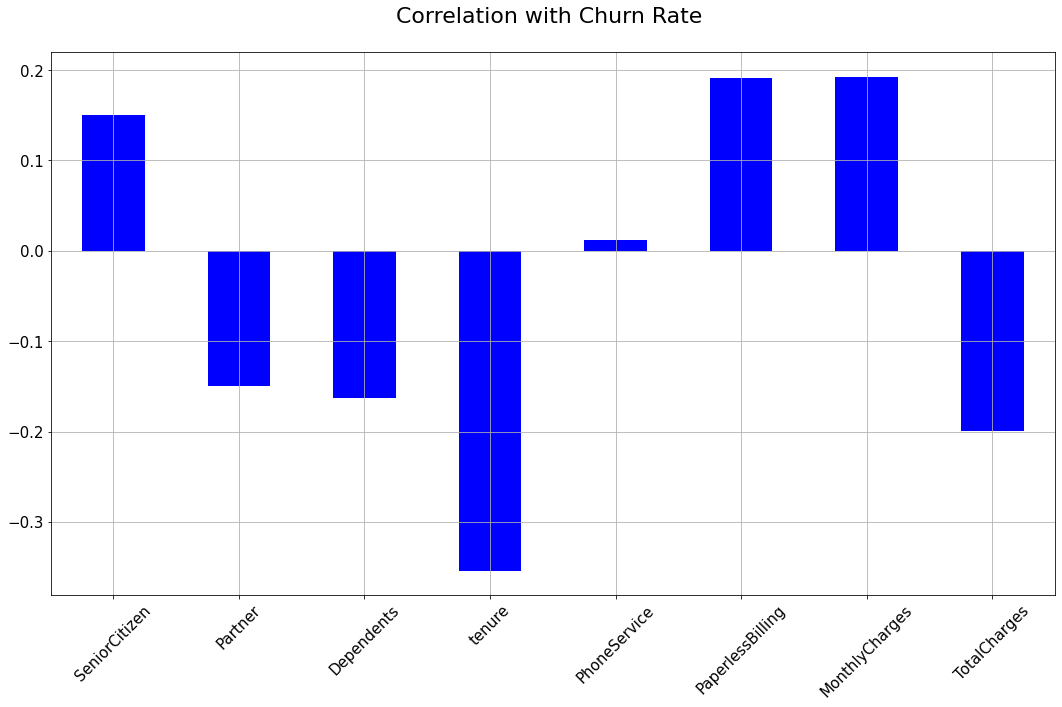

In [32]:
# Checking the correlation in relation with target column Churn.

datacorr = data[['SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling',
        'MonthlyCharges', 'TotalCharges']]

correlations = datacorr.corrwith(data.Churn)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = 'blue',
        rot = 45, grid = True)
plt.title('Correlation with Churn Rate \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

Senior citizen, paperlessbilling, monthlycharges are positively correlated with churn column and tenure is negatiely correlated with Churn.

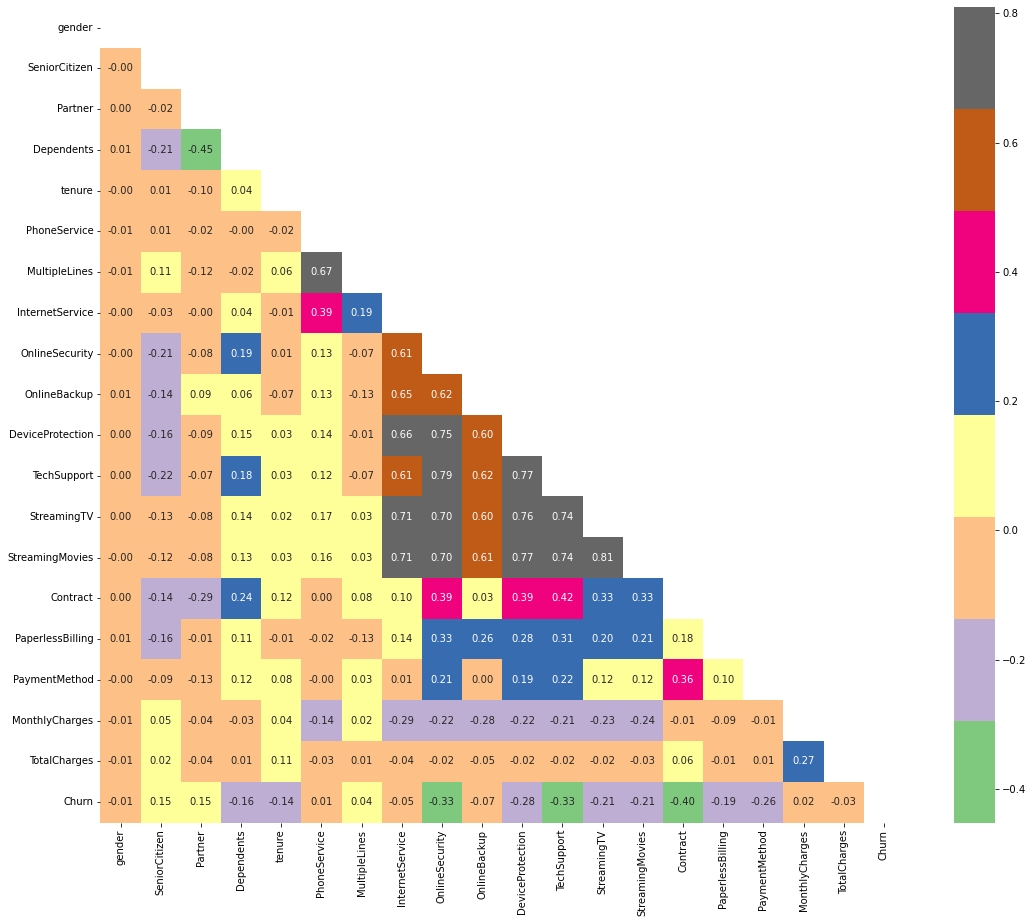

In [33]:
# Set and compute the Correlation Matrix:

plt.figure(figsize=(18, 15))

corr = data.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='Accent', fmt='0.2f')

<AxesSubplot:>

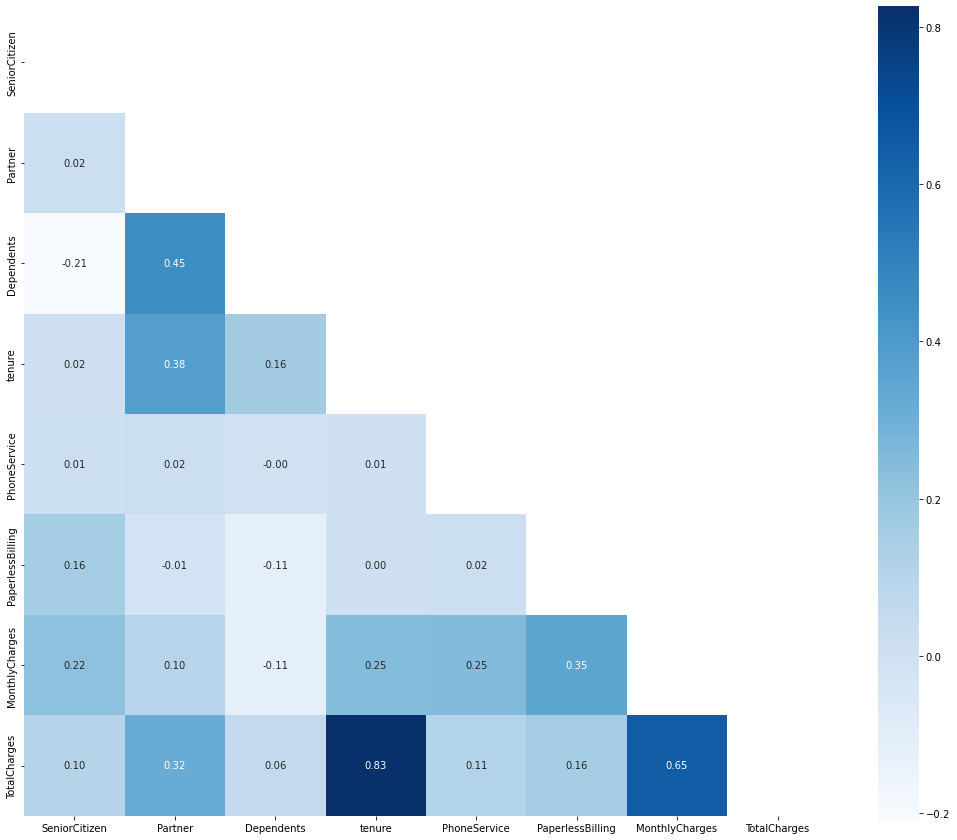

In [34]:
#Set and compute the Correlation Matrix:

corr = datacorr.corr()

#Generate a mask for the upper triangle:

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Set up the matplotlib figure and a diverging colormap:
f, ax = plt.subplots(figsize=(18, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Draw the heatmap with the mask and correct aspect ratio:
sns.heatmap(corr, mask=mask, cmap='Blues',square=True,annot = True, fmt='0.2f')

In [35]:
# Label Encoding.

def encode_data(dataframe):
    if dataframe.dtype == "object":
        dataframe = LabelEncoder().fit_transform(dataframe)
    return dataframe

data = data.apply(lambda x: encode_data(x))
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


Seaparting the dataset in features and target.

In [36]:
X = data.drop(columns = "Churn")
y = data["Churn"].values

In [37]:
# Importing the libraries.
from sklearn.model_selection import train_test_split
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4, stratify =y)


In [38]:
# Checking the Normalization for the columns.

def distplot(feature, frame, color='b'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

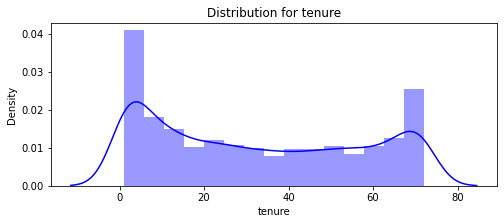

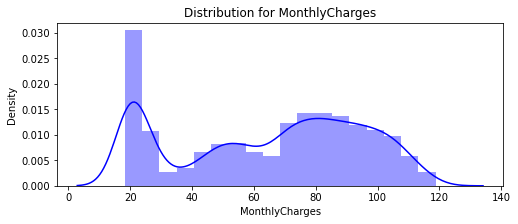

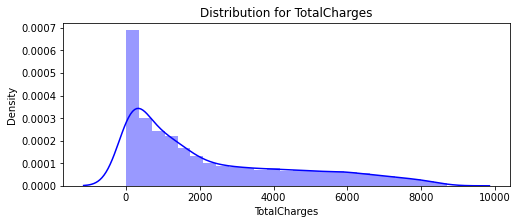

In [39]:
# These three features need standardization.

col =  ["tenure", 'MonthlyCharges', 'TotalCharges']
for features in col :distplot(features, data)

# Data Scaling

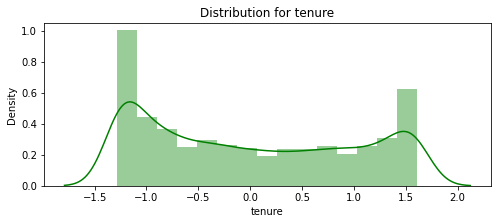

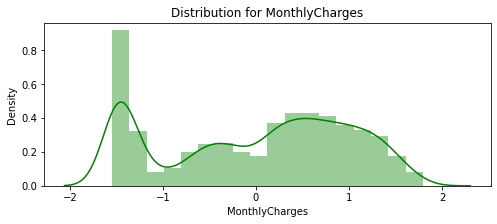

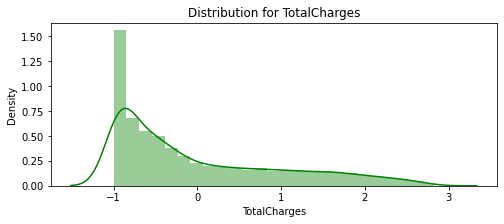

In [40]:
# Data Scaling using standardscaler.

from sklearn.preprocessing import StandardScaler
stand_data= pd.DataFrame(StandardScaler().fit_transform(data[col]).astype('float64'), columns = col)
for feat in col: distplot(feat, stand_data, color='g')

In [41]:
# One hot and label encoding.

one_hot_encode =['PaymentMethod', 'Contract', 'InternetService'] # those that need one-hot encoding
label_encode = list(set(X_train.columns)- set(col) - set(one_hot_encode)) #those that need label encoding

print(label_encode)

['SeniorCitizen', 'TechSupport', 'OnlineSecurity', 'OnlineBackup', 'PaperlessBilling', 'MultipleLines', 'gender', 'StreamingTV', 'Partner', 'PhoneService', 'StreamingMovies', 'Dependents', 'DeviceProtection']


In [42]:
# Data scaling X_train and X_test.

scaler = StandardScaler()
X_train[col] = StandardScaler().fit_transform(X_train[col])
X_test[col] = StandardScaler().fit_transform(X_test[col])

In [43]:
X_train[col]

,tenure,MonthlyCharges,TotalCharges
1600,-1.280379,0.799822,-0.967736
2942,0.554794,-1.494430,-0.605619
2802,-0.016149,1.336313,0.476197
6143,0.717921,-1.481101,-0.591502
669,1.533553,-0.233175,0.780561
...,...,...,...
578,0.106196,0.991426,0.482326
185,-1.280379,-1.332816,-0.996059
1465,-1.280379,0.326643,-0.974020
1729,1.288864,0.821481,1.512252


In [44]:
X_test[col]

,tenure,MonthlyCharges,TotalCharges
653,-0.629446,-1.322052,-0.800010
1763,-1.239296,-0.641192,-0.972743
5103,-0.182223,0.596585,0.008480
2455,-1.117326,0.811419,-0.805946
5087,-1.239296,-1.469131,-0.989872
...,...,...,...
628,1.606670,1.548467,2.471623
1030,0.712224,0.163611,0.550335
4489,1.281417,-0.361907,0.481185
5998,0.630910,-1.479046,-0.554359


In [45]:
# Importing necessary libraries.

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report



# Logistic Regression

In [46]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
pred_lr=lr.predict(X_test)
print("Accuracy:",accuracy_score(y_test,pred_lr)*100)

# Checking the confusion matrix and classification report.

print(confusion_matrix(y_test,pred_lr))
print(classification_report(y_test,pred_lr))

Accuracy: 80.56872037914692
[[1386  163]
 [ 247  314]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1549
           1       0.66      0.56      0.61       561

    accuracy                           0.81      2110
   macro avg       0.75      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110



# RandomForestClassifier

In [47]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
pred_rf = rf.predict(X_test)
print("Accuracy:",accuracy_score(y_test,pred_rf)*100)

# Checking the confusion matrix and classification report.

print(confusion_matrix(y_test,pred_rf))
print(classification_report(y_test,pred_rf))

Accuracy: 79.5260663507109
[[1390  159]
 [ 273  288]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.64      0.51      0.57       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.78      0.80      0.79      2110



# DecisionTree Classifier

In [48]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
pred_dt = dt.predict(X_test)
print("Accuracy:",accuracy_score(y_test,pred_dt)*100)

# Checking the confusion matrix and classification report.

print(confusion_matrix(y_test,pred_dt))
print(classification_report(y_test,pred_dt))

Accuracy: 71.09004739336493
[[1225  324]
 [ 286  275]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1549
           1       0.46      0.49      0.47       561

    accuracy                           0.71      2110
   macro avg       0.63      0.64      0.64      2110
weighted avg       0.72      0.71      0.71      2110



# SVC

In [49]:
svc=SVC()
svc.fit(X_train,y_train)
pred_svc=svc.predict(X_test)
print("Accuracy:",accuracy_score(y_test,pred_svc)*100)

# Checking the confusion matrix and classification report.

print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

Accuracy: 79.38388625592417
[[1415  134]
 [ 301  260]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1549
           1       0.66      0.46      0.54       561

    accuracy                           0.79      2110
   macro avg       0.74      0.69      0.71      2110
weighted avg       0.78      0.79      0.78      2110



# AdaBoost Classifier

In [50]:
ada= AdaBoostClassifier()
ada.fit(X_train,y_train)
pred_ada=ada.predict(X_test)
print("Accuracy:",accuracy_score(y_test,pred_ada)*100)

# Checking the confusion matrix and classification report.

print(confusion_matrix(y_test,pred_ada))
print(classification_report(y_test,pred_ada))


Accuracy: 81.23222748815165
[[1412  137]
 [ 259  302]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1549
           1       0.69      0.54      0.60       561

    accuracy                           0.81      2110
   macro avg       0.77      0.72      0.74      2110
weighted avg       0.80      0.81      0.80      2110



# ExtraTrees Classifier

In [51]:
etc = ExtraTreesClassifier()
etc.fit(X_train,y_train)
pred_etc=etc.predict(X_test)
print("Accuracy:",accuracy_score(y_test,pred_etc)*100)

# Checking the confusion matrix and classification report.

print(confusion_matrix(y_test,pred_etc))
print(classification_report(y_test,pred_etc))


Accuracy: 77.6303317535545
[[1367  182]
 [ 290  271]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1549
           1       0.60      0.48      0.53       561

    accuracy                           0.78      2110
   macro avg       0.71      0.68      0.69      2110
weighted avg       0.76      0.78      0.77      2110



# GradientBoost Classifier

In [52]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
pred_gbc=gbc.predict(X_test)
print("Accuracy:",accuracy_score(y_test,pred_gbc)*100)

# Checking the confusion matrix and classification report.

print(confusion_matrix(y_test,pred_gbc))
print(classification_report(y_test,pred_gbc))


Accuracy: 80.4739336492891
[[1405  144]
 [ 268  293]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1549
           1       0.67      0.52      0.59       561

    accuracy                           0.80      2110
   macro avg       0.76      0.71      0.73      2110
weighted avg       0.79      0.80      0.80      2110



# XGBClaaifier

In [53]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
pred_xgb=xgb.predict(X_test)
print("Accuracy:",accuracy_score(y_test,pred_xgb)*100)

# Checking the confusion matrix and classification report.

print(confusion_matrix(y_test,pred_xgb))
print(classification_report(y_test,pred_xgb))


Accuracy: 77.20379146919431
[[1353  196]
 [ 285  276]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1549
           1       0.58      0.49      0.53       561

    accuracy                           0.77      2110
   macro avg       0.71      0.68      0.69      2110
weighted avg       0.76      0.77      0.77      2110



# Cross Validation for each model

In [54]:
# Checking the cross validation score for Logistic Regression.

from sklearn.model_selection import cross_val_score
cvs=cross_val_score(lr,X,y,cv=10)
print('Cross_validation_score for LogisticRegression is:',cvs.mean())

Cross_validation_score for LogisticRegression is: 0.7984932674899781


In [55]:
# Checking the cross validation score for RandomForestClassifier.

from sklearn.model_selection import cross_val_score
cvs=cross_val_score(rf,X,y,cv=10)
print('Cross_validation_score for RandomForestClassifier is:',cvs.mean())

Cross_validation_score for RandomForestClassifier is: 0.7930858415233415


In [56]:
# Checking the cross validation score for DecisionTreeClassifier.

from sklearn.model_selection import cross_val_score
cvs=cross_val_score(dt,X,y,cv=10)
print('Cross_validation_score for Decision tree classifier is:',cvs.mean())


Cross_validation_score for Decision tree classifier is: 0.7362072449243502


In [57]:
# Checking the cross validation score for SVC.

from sklearn.model_selection import cross_val_score
cvs=cross_val_score(svc,X,y,cv=10)
print('Cross_validation_score for SVC is:',cvs.mean())


Cross_validation_score for SVC is: 0.7342149715504979


In [58]:
# Checking the cross validation score for AdaboostClassifier.

from sklearn.model_selection import cross_val_score
cvs=cross_val_score(ada,X,y,cv=10)
print('Cross_validation_score for AdaBoostClassifier is:',cvs.mean())


Cross_validation_score for AdaBoostClassifier is: 0.8014766261476787


In [59]:
# Checking the cross validation score for ExtraTreesClassifier.

from sklearn.model_selection import cross_val_score
cvs=cross_val_score(etc,X,y,cv=10)
print('Cross_validation_score for ExtreesClassifier is:',cvs.mean())


Cross_validation_score for ExtreesClassifier is: 0.779007581145739


In [60]:
# Checking the cross validation score for GradientBoostingClassifier.

from sklearn.model_selection import cross_val_score
cvs=cross_val_score(gbc,X,y,cv=13)
print('Cross_validation_score for GradientBoosting Classifier is:',cvs.mean())


Cross_validation_score for GradientBoosting Classifier is: 0.8060308282119742


In [61]:
# Checking the cross validation score for XGBClassifier.

from sklearn.model_selection import cross_val_score
cvs=cross_val_score(xgb,X,y,cv=13)
print('Cross_validation_score for XGBClassifier is:',cvs.mean())


Cross_validation_score for XGBClassifier is: 0.7838473124055378


We choose the model on basis of lowest difference between model accuracy score and cross validation score of that model,we observe that we got less difference and good accuracy for two model AdaBoostClassifier and GradientBoostClassifier,so we will perform hyper parameter tunning for both and then will decide.

# Hyper parameter tunning

In [62]:
# Hyper parameter tunning for AdaBoost Classifier model.

from sklearn.model_selection import RandomizedSearchCV

params = {'n_estimators': [10,50,100,400,500],
          "learning_rate":  [0.001, 0.01, 0.1, 0.3],
          'random_state':[20,30,40,50]
         }
rsv = RandomizedSearchCV(ada, param_distributions = params, n_iter = 5,
                                   scoring = 'roc_auc') # other option accuracy
rsv.fit(X_train, y_train)

RandomizedSearchCV(estimator=AdaBoostClassifier(), n_iter=5,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1,
                                                          0.3],
                                        'n_estimators': [10, 50, 100, 400, 500],
                                        'random_state': [20, 30, 40, 50]},
                   scoring='roc_auc')

In [67]:
rsv.best_params_

{'random_state': 20, 'n_estimators': 50, 'learning_rate': 0.01}

In [68]:
rsv.best_score_

0.7878012144214458

In [69]:
rsv_fit=rsv.best_estimator_.fit(X_train, y_train)

In [71]:
from sklearn.metrics import roc_auc_score

pred_test = rsv_fit.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,pred_test)

0.779687084646641

In [72]:
# Hyper parameter tunning for GradientBoost Classifier model.
from scipy.stats import randint
param_grid = {'loss' : ['deviance', 'exponential'],
                 'n_estimators': randint(10, 100),
                 'max_depth': randint(1,20)}
# Initialization
gb = RandomizedSearchCV(gbc, param_distributions = param_grid, n_iter = 5,
                                   scoring = 'roc_auc')
# Fitting the model
gb.fit(X_train, y_train)

RandomizedSearchCV(estimator=GradientBoostingClassifier(), n_iter=5,
                   param_distributions={'loss': ['deviance', 'exponential'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000029AAFDD00D0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000029AB1D6A160>},
                   scoring='roc_auc')

In [73]:
gb.best_params_

{'loss': 'exponential', 'max_depth': 1, 'n_estimators': 36}

In [74]:
gb.best_score_

0.8349915944929132

In [75]:
best_fit = gb.best_estimator_.fit(X_train, y_train)

In [76]:
pred_test = best_fit.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,pred_test)

0.831349994073573

We got best results for both AdaBoost and GradientBoost,but we have to choose one of then and we will choose Gradient boost as it is giving the same and accurate result after hyper parameter tunning.

# Saving Model

In [77]:
import joblib
joblib.dump(gb.best_estimator_,"Customer Churn Project.obj")

['Customer Churn Project.obj']